In [2]:
!pip install face_recognition

     |████████████████████████████████| 100.2MB 107kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566172 sha256=1a2bffa0d0825aecd0870d8487998f75d1fb9605bbba7dde73d1fbbfbb72edb0
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [3]:
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import data,exposure
import cv2

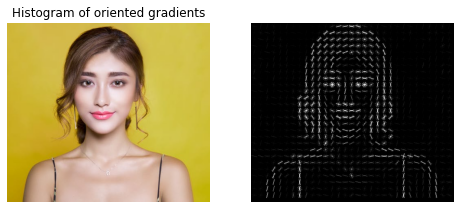

In [6]:
image =cv2.imread("/content/sample_data/pic_1.jpeg")
image =cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
fd,hog_image = hog(image,orientations=8,pixels_per_cell=(16,16),cells_per_block=(1,1),visualize=True,multichannel=True)

#plot input and hog image
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(8,4),sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image,cmap=plt.cm.gray)
ax1.set_title("Input image")

#rescale the image for better diaplay
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0,10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled,cmap=plt.cm.gray)
ax1.set_title("Histogram of oriented gradients")
plt.show()

In [7]:
image.shape

(441, 500, 3)

In [8]:
len(fd)

6696

In [9]:
import face_recognition
from matplotlib.patches import Rectangle,Circle
import numpy as np
%matplotlib inline

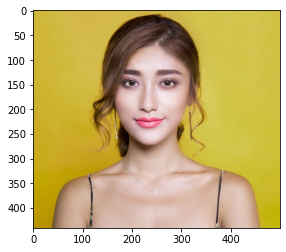

In [11]:
#load the jpeg file to numpy array
image = cv2.imread("/content/sample_data/pic_1.jpeg")
image =cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [12]:
face_locations=face_recognition.face_locations(image)
no_of_faces = len(face_locations)
print("Faces found in image ={}".format(no_of_faces))

Faces found in image =1


A face is located at pixel location Top: 139, Left: 98, Bottom: 324, Right: 284


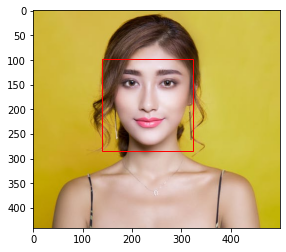

In [14]:
#get axis handles
plt.imshow(image)
ax=plt.gca()

for face_location in face_locations:
  top,right,bottom,left = face_location
  x,y,w,h = left,top,right,bottom
  print("A face is located at pixel location Top: {}, Left: {}, Bottom: {}, Right: {}". format(x,y,w,h))

  rect = Rectangle((x,y),w-x,h-y,fill=False,color='red')
  ax.add_patch(rect)
plt.show()